In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from collections import defaultdict
from matplotlib.cm import get_cmap
from matplotlib.colors import to_hex
from matplotlib.colors import LinearSegmentedColormap

control_sampels = ['ERR12814420','ERR12814421','ERR12814426',
                   'ERR12814433','ERR12814441','ERR12814451',
                   'ERR12814459','ERR12814466','ERR12814477',
                   'ERR12814478','ERR12814479','ERR12814480','ERR12814481']
name_age_dict = {}
megahit_name_age_dict = {}
numbers_to_string_dict = {}
with open('/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/mag/mag_results3/combinedQUAST_table.csv',newline='') as csvfile:
    data = list(csv.reader(csvfile))
    
for i in range(1,len(data)):
    megahit_name_age_dict[data[i][0]] = float(data[i][23])
    name = str(data[i][0]).replace("MEGAHIT-","")
    name_age_dict[name] = float(data[i][23])

value_to_keys = defaultdict(list)
for key, value in name_age_dict.items():
    value_to_keys[value].append(key)
duplicates = {value: keys for value, keys in value_to_keys.items() if len(keys) > 1}
duplicate_samples = []
megahit_duplicates_samples = []
for value in duplicates.values():

    name_age_dict.pop(value[0])
    megahit_name_age_dict.pop("MEGAHIT-"+value[0]) 
    
    duplicate_samples.append(value[0])
    megahit_duplicates_samples.append("MEGAHIT-"+value[0])
    
print(name_age_dict.keys())
for i in range(len(control_sampels)):
    name_age_dict[control_sampels[i]] = float(i+1) * (-1.0)
    megahit_name_age_dict["MEGAHIT-"+control_sampels[i]] = float(i+1) * (-1.0)
    numbers_to_string_dict[name_age_dict[control_sampels[i]]] =str(name_age_dict[control_sampels[i]])
    pass
print(name_age_dict)
print(megahit_name_age_dict)
print(name_age_dict.values())
print(numbers_to_string_dict)
print(len(duplicates.keys()))
print(duplicate_samples)


tab20c = get_cmap('tab20c')
tab20b = get_cmap('tab20b')
set3 = get_cmap('Set3')
custom_colours = [to_hex(tab20c(i)) for i in range(20)] + [to_hex(tab20b(i)) for i in range(20)] + [to_hex(set3(i)) for i in range(12)]
colours = tab20c(np.linspace(0,1,25))
colour_stacked_bar = ['#3182bd','#fd8d3c']
colour_scatter = ['#3182bd','#fd8d3c','#31a354','#756bb1']
damage_colour_dict = {'damage':'#3182bd', 'no_damage':'#fd8d3c'}

dict_keys(['ERR12814414', 'ERR12814416', 'ERR12814417', 'ERR12814418', 'ERR12814419', 'ERR12814422', 'ERR12814424', 'ERR12814425', 'ERR12814428', 'ERR12814430', 'ERR12814431', 'ERR12814432', 'ERR12814434', 'ERR12814436', 'ERR12814438', 'ERR12814440', 'ERR12814443', 'ERR12814444', 'ERR12814446', 'ERR12814448', 'ERR12814450', 'ERR12814453', 'ERR12814454', 'ERR12814455', 'ERR12814457', 'ERR12814458', 'ERR12814460', 'ERR12814461', 'ERR12814463', 'ERR12814464', 'ERR12814465', 'ERR12814467', 'ERR12814469', 'ERR12814470', 'ERR12814471', 'ERR12814472', 'ERR12814473', 'ERR12814474', 'ERR12814475', 'ERR12814476'])
{'ERR12814414': 17.7, 'ERR12814416': 17.4, 'ERR12814417': 17.0, 'ERR12814418': 16.6, 'ERR12814419': 16.3, 'ERR12814422': 15.9, 'ERR12814424': 15.5, 'ERR12814425': 15.1, 'ERR12814428': 14.7, 'ERR12814430': 14.1, 'ERR12814431': 13.5, 'ERR12814432': 13.3, 'ERR12814434': 12.6, 'ERR12814436': 12.2, 'ERR12814438': 11.7, 'ERR12814440': 11.2, 'ERR12814443': 10.3, 'ERR12814444': 9.3, 'ERR128144

In [ ]:
df_bins_contigs = pd.read_csv('/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/bins_contigs.csv', index_col=False) #medium and hq bins with their contigs
df_hq_mq_tax = pd.read_csv('/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/hq_mg_gtdbtk_tax.csv', index_col=False) #taxonomy


In [ ]:
samples = ['ERR12814414', 'ERR12814416', 'ERR12814417', 'ERR12814418', 'ERR12814419', 'ERR12814422', 
           'ERR12814424', 'ERR12814425', 'ERR12814428', 'ERR12814430', 'ERR12814431', 'ERR12814432', 
           'ERR12814434', 'ERR12814436', 'ERR12814438', 'ERR12814440', 'ERR12814443', 'ERR12814444', 
           'ERR12814446', 'ERR12814448', 'ERR12814450', 'ERR12814453', 'ERR12814454', 'ERR12814455', 
           'ERR12814457', 'ERR12814458', 'ERR12814460', 'ERR12814461', 'ERR12814463', 'ERR12814464', 
           'ERR12814465', 'ERR12814467', 'ERR12814469', 'ERR12814470', 'ERR12814471', 'ERR12814472', 
           'ERR12814473', 'ERR12814474', 'ERR12814475', 'ERR12814476']
df_CtoT = pd.DataFrame()
df_bins_contigs_mapdamage = pd.DataFrame()
for sample in samples:
    df_sample = pd.read_csv(f'/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/mapdamage/output/results_MEGAHIT-{sample}-{sample}/misincorporation.txt', delimiter='\t',index_col=False,skiprows=3)
    
    df_sample['Sample'] = sample
    df_sample['Sample'].replace(name_age_dict, inplace=True)

    df_sample = df_sample[['Sample','Chr','End','Pos','C','T','C>T']]
    
    #occurrences of mutations / #occurrences of the reference nucleotide
    #C>T /#C
    df_sample['CtoT_freq'] = df_sample['C>T'] / df_sample['C']

    df_sample['contig_id'] = df_sample['Chr']
    df_bins_contigs_mapdamage_sample = df_bins_contigs.merge(df_sample, on=['Sample','contig_id']).dropna()
    df_bins_contigs_mapdamage = pd.concat([df_bins_contigs_mapdamage, df_bins_contigs_mapdamage_sample], ignore_index=True)

    df_sample = df_sample[(df_sample['Pos'] == 1)].dropna()

    tmp = df_sample[['Sample','CtoT_freq']]

    df_CtoT = pd.concat([df_CtoT, tmp], ignore_index=True)
    
print('df_CtoT',len(df_CtoT))

ERR12814414
ERR12814416
ERR12814417
ERR12814418
ERR12814419
ERR12814422
ERR12814424
ERR12814425
ERR12814428
ERR12814430
ERR12814431
ERR12814432
ERR12814434
ERR12814436
ERR12814438
ERR12814440
ERR12814443
ERR12814444
ERR12814446
ERR12814448
ERR12814450
ERR12814453
ERR12814454
ERR12814455
ERR12814457
ERR12814458
ERR12814460
ERR12814461
ERR12814463
ERR12814464
ERR12814465
ERR12814467
ERR12814469
ERR12814470
ERR12814471
ERR12814472
ERR12814473
ERR12814474
ERR12814475
ERR12814476
df_CtoT 15760399


Index(['Sample', 'CtoT_freq'], dtype='object')
[17.7, 17.4, 17.0, 16.6, 16.3, 15.9, 15.5, 15.1, 14.7, 14.1, 13.5, 13.3, 12.6, 12.2, 11.7, 11.2, 10.3, 9.3, 9.0, 8.2, 7.6, 7.2, 6.8, 6.6, 6.2, 5.5, 5.0, 4.7, 4.3, 3.5, 3.1, 2.5, 2.3, 1.9, 1.6, 1.1, 0.9, 0.7, 0.5, 0.1]
1.0


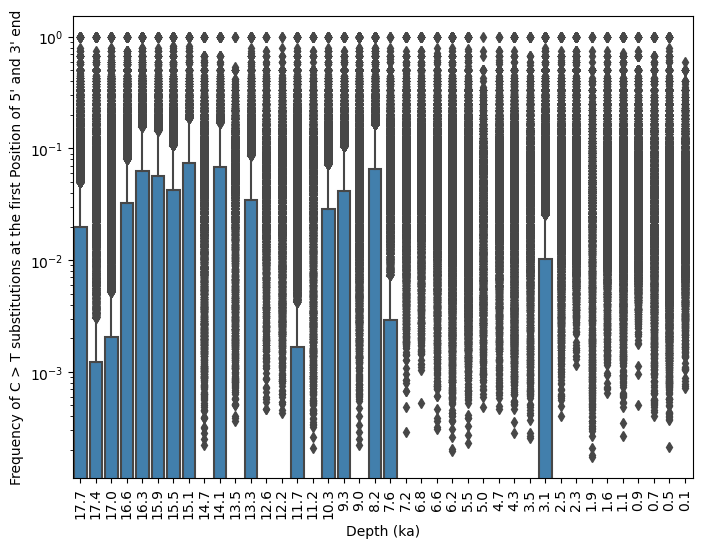

In [ ]:
print(df_CtoT.columns)

order_list = sorted(df_CtoT['Sample'].unique(), reverse=True)
print(order_list)

print(df_CtoT['CtoT_freq'].max())
df_unique = df_CtoT.drop_duplicates()

df_sampled = df_CtoT.groupby('Sample').sample(frac=0.1, random_state=42)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sample', y='CtoT_freq', data=df_sampled, order=order_list, color="#3182bd")

plt.ylabel("Frequency of C > T substitutions at the first Position of 5' and 3' end")
plt.xlabel("Depth (ka)")
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

Hydromicrobium
Acidovorax
Pararheinheimera
Pseudomonas
Pseudolabrys


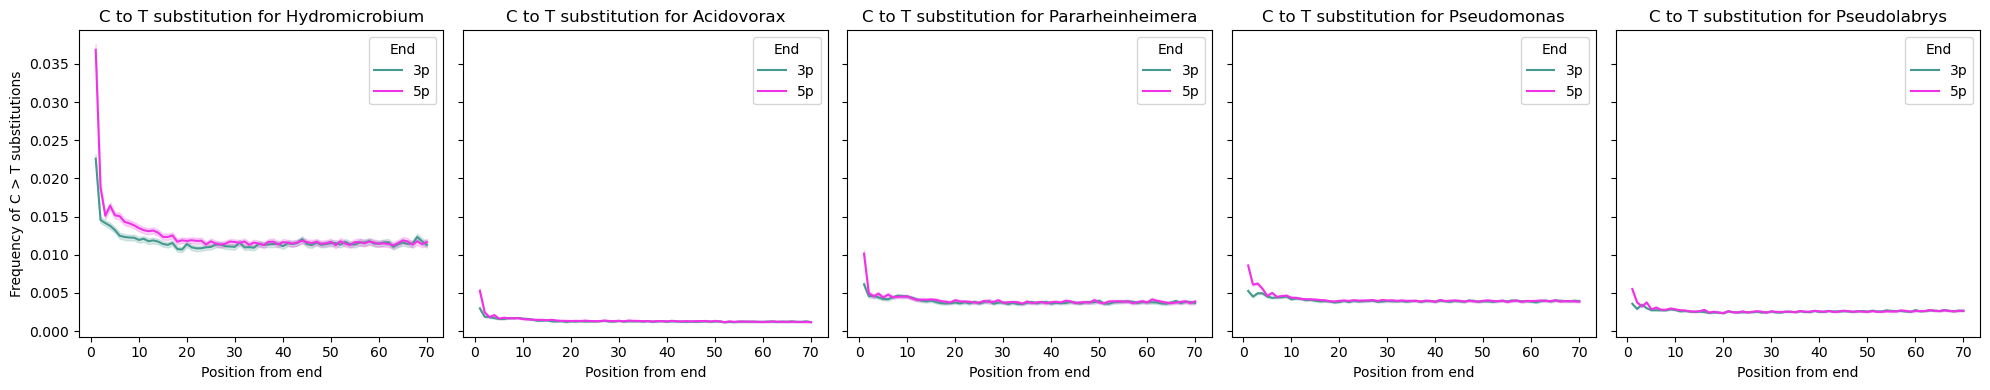

In [ ]:
df_bins_contigs_mapdamage_all = df_bins_contigs_mapdamage[['Sample', 'bin', 'contig_id', 'End', 'Pos', 'CtoT_freq']]
df_bins_contigs_mapdamage_all['bin'] = df_bins_contigs_mapdamage['bin'].str[:-3]
print(len(df_bins_contigs_mapdamage_all))

df_bins_contigs_mapdamage_tax = df_bins_contigs_mapdamage_all.merge(df_hq_mq_tax, on=['Sample','bin'])

df_select = df_bins_contigs_mapdamage_tax[(df_bins_contigs_mapdamage_tax['genus'] == 'Hydromicrobium') | (df_bins_contigs_mapdamage_tax['genus'] == 'Pseudolabrys') |(df_bins_contigs_mapdamage_tax['genus'] == 'Acidovorax') | (df_bins_contigs_mapdamage_tax['genus'] == 'Pararheinheimera')| (df_bins_contigs_mapdamage_tax['genus'] == 'Pseudomonas')]

colour =['#469990','#f032e6']
fig, axes = plt.subplots(1,5,figsize=(20, 4), sharey =True)
i=0
for genus in df_select['genus'].unique():
    print(genus)
    df = df_select[df_select['genus'] == genus]
    sns.lineplot(data=df, y='CtoT_freq', x='Pos', hue='End', ax=axes[i], palette=colour)
    axes[i].set_title(f'C to T substitution for {genus}')
    axes[i].set_ylabel("Frequency of C > T substitutions")
    axes[i].set_xlabel("Position from end")
    i+=1
plt.tight_layout()